In [1]:
from transformers import RagTokenizer, RagRetriever, RagSequenceForGeneration
import torch
from datasets import load_from_disk
device = torch.device("cuda:0")

ds = load_from_disk("/workspace/data/filtered_small_embeddings")["train"]
def get_title_examples(examples):
    split_title = [ i.split("\n")[0] for i in examples["sentence_split"]]
    examples["title"] = split_title
    return examples
ds = ds.map(get_title_examples, batched=True, num_proc=32)
ds

/opt/conda/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Loading cached processed dataset at /workspace/data/filtered_small_embeddings/train/cache-ad7b2808eebbeac2.arrow
Loading cached processed dataset at /workspace/data/filtered_small_embeddings/train/cache-13b56d373270ca93.arrow
Loading cached processed dataset at /workspace/data/filtered_small_embeddings/train/cache-a75db0b3528888c1.arrow
Loading cached processed dataset at /workspace/data/filtered_small_embeddings/train/cache-e2062bde0f8c5658.arrow
Loading cached processed dataset at /workspace/data/filtered_small_embeddings/train/cache-09f64d49b81279aa.arrow
Loading cached processed dataset at /workspace/data/filtered_small_embeddings/train/cache-dae32e8759c00613.arrow
Loading cached processed dataset at /workspace/data/filtered_small_embeddings/

Dataset({
    features: ['date', 'sentence_split', 'non_split', 'hash', 'embeddings', 'title'],
    num_rows: 177300
})

In [2]:
df = ds.to_pandas()

In [3]:
from collections import Counter

In [4]:
Counter([ i==j for i,j in zip(df["sentence_split"], df["non_split"])])

Counter({False: 176989, True: 311})

In [5]:
for i,j in zip(df["sentence_split"], df["non_split"]):
    if i!=j:
        print(j)
        break

Radiohead - Music - New York Times

LOS ANGELES - "In Rainbows," the latest album from the British rock band Radiohead, has been readily available to music fans for almost three months, first as a digital download in an unconventional tip-jar offering in which fans decided for themselves what to pay for it, and then, like most pop music today, as digital files circulating on free, unlicensed file-swapping networks. One matter remains: Will anyone buy the CD?

Starting on Tuesday, the album, in plastic disc form, is on sale in record shops (this time with a list price, $13.98, that is not subject to consumer whims). Though hard-core fans almost surely have acquired the album, one way or another, Radiohead had plans to promote the CD release with a "prerecording" of the band performing songs from "In Rainbows" on the www.radiohead.tv Web site starting on Monday, according to the band's Web site, radiohead.com. It is also to be shown on satellite and cable systems that carry the Current T

In [6]:
df["sentence_split_list"] = [ [i for i in i.split("\n")[1:] if len(i)>0] for i in df["non_split"]]

In [7]:
df

,date,sentence_split,non_split,hash,embeddings,title,sentence_split_list
0,20080101,Radiohead - Music - New York Times\nLOS ANGELE...,Radiohead - Music - New York Times\n\nLOS ANGE...,3d6943d8ea557c6b60bd9b88474c2f68751e72d7993ff5...,"[0.36299476, -0.06389122, 0.35738632, 0.122280...",Radiohead - Music - New York Times,"[LOS ANGELES - ""In Rainbows,"" the latest album..."
1,20080101,Huckabee Shows Negative Spot After Pulling It ...,Huckabee Shows Negative Spot After Pulling It ...,88b7a7e093e77a3e401519a2563016e1284954b3e7bc40...,"[0.24303254, 0.3653328, 0.056599963, 0.0806784...",Huckabee Shows Negative Spot After Pulling It ...,[DES MOINES - In a bizarre bit of political th...
2,20080101,Gumbel Is Precisely the Problem for the NFL Ne...,Gumbel Is Precisely the Problem for the NFL Ne...,96fc64e2c3e274d3326079683aba277d7a366e0a72d55f...,"[0.08627419, 0.2024003, -0.013621029, -0.34191...",Gumbel Is Precisely the Problem for the NFL Ne...,[One of the risks the NFL Network faced by hav...
3,20080101,"Scoring Four in Second, Isles Beat the Hurrica...","Scoring Four in Second, Isles Beat the Hurrica...",9ef800f229069d1e8a8eb7f46883d47ba31fd1bc26b009...,"[-0.16298355, -0.04860712, 0.37003276, 0.09193...","Scoring Four in Second, Isles Beat the Hurricanes",[Marc-Andre Bergeron had two goals and an assi...
4,20080101,"Pat Kirkwood, Star of British Musical Theater,...","Pat Kirkwood, Star of British Musical Theater,...",700c1815a2fa432aa5e18e46e45a59ccf9928aa8faa469...,"[-0.45718825, -0.018084839, 0.46993467, -0.497...","Pat Kirkwood, Star of British Musical Theater,...","[LONDON (AP) - Pat Kirkwood, once a star of Br..."
...,...,...,...,...,...,...,...
177295,20131231,Doctors behind ADHD study question drug treatm...,Doctors behind ADHD study question drug treatm...,80a6402c80a867d9dea1e1c708f0d0922ead75a18eb503...,"[0.28165033, 0.3630367, 0.08441983, -0.0937929...",Doctors behind ADHD study question drug treatm...,[The co-authors of a 20-year-old study promoti...
177296,20131226,'Egypt returns to pre-2011 situation' - RT Op-...,'Egypt returns to pre-2011 situation' - RT Op-...,c741f17b0e2c26644d0a541736c0478ff7135b81807d54...,"[0.4883721, 0.3118963, -0.12314952, -0.2037451...",'Egypt returns to pre-2011 situation' - RT Op-...,[Egyptian people believe the labeling of the M...
177297,20131220,First space robot asks Santa for rocket for Ch...,First space robot asks Santa for rocket for Ch...,7ca850d28ab68cccf51527f29f0240956a14c2eb368ca6...,"[-0.12727721, 0.3181608, 0.73506653, 0.1760502...",First space robot asks Santa for rocket for Ch...,[Japanese astronaut Koichi Wakata (L) smiling ...
177298,20131223,Print - Freed Pussy Riot Rockers: Amnesty - Pu...,Print - Freed Pussy Riot Rockers: Amnesty - Pu...,df09e07549340cf4dd2edccec76b72c223c0196beaad5d...,"[0.81098926, -0.04812907, 0.29949614, -0.00753...",Print - Freed Pussy Riot Rockers: Amnesty - Pu...,[The two members of Russian punk band Pussy Ri...


In [8]:
df_filterd = df[["date","hash","title","sentence_split_list"]]
filtered = []
for i in df_filterd.values:
    for j in i[3]:
        filtered.append([i[0],i[1],i[2],j])
len(filtered)

3034846

In [9]:
import pandas as pd
filtered_df= pd.DataFrame(filtered, columns=["date","hash","title","sentence"])

In [10]:
filtered_df

,date,hash,title,sentence
0,20080101,3d6943d8ea557c6b60bd9b88474c2f68751e72d7993ff5...,Radiohead - Music - New York Times,"LOS ANGELES - ""In Rainbows,"" the latest album ..."
1,20080101,3d6943d8ea557c6b60bd9b88474c2f68751e72d7993ff5...,Radiohead - Music - New York Times,"Starting on Tuesday, the album, in plastic dis..."
2,20080101,3d6943d8ea557c6b60bd9b88474c2f68751e72d7993ff5...,Radiohead - Music - New York Times,"Though hailed by critics, the album is seen as..."
3,20080101,3d6943d8ea557c6b60bd9b88474c2f68751e72d7993ff5...,Radiohead - Music - New York Times,Radiohead chose to release the CD through the ...
4,20080101,3d6943d8ea557c6b60bd9b88474c2f68751e72d7993ff5...,Radiohead - Music - New York Times,"As a result, it is seen as a long shot that th..."
...,...,...,...,...
3034841,20131218,0ea9024160fabb54122f2e7fa9990c70f141cc1b570ed6...,Print - Ukraine's Yanukovych on Controversial ...,"""No one from the media or amongst the Ukrainia..."
3034842,20131218,0ea9024160fabb54122f2e7fa9990c70f141cc1b570ed6...,Print - Ukraine's Yanukovych on Controversial ...,Russia is trying to lure Ukraine into its own ...
3034843,20131218,0ea9024160fabb54122f2e7fa9990c70f141cc1b570ed6...,Print - Ukraine's Yanukovych on Controversial ...,The opposition is planning another massive ral...
3034844,20131218,0ea9024160fabb54122f2e7fa9990c70f141cc1b570ed6...,Print - Ukraine's Yanukovych on Controversial ...,"All rights reserved, 2001-2013 (c) Novinite Ltd."


(array([7.07235e+05, 9.93601e+05, 7.44935e+05, 3.32173e+05, 1.32633e+05,
        5.77870e+04, 3.00690e+04, 1.40610e+04, 9.56700e+03, 4.91800e+03,
        2.70500e+03, 1.79000e+03, 1.08500e+03, 6.05000e+02, 4.05000e+02,
        2.50000e+02, 1.99000e+02, 1.34000e+02, 1.01000e+02, 9.10000e+01,
        5.60000e+01, 6.40000e+01, 3.70000e+01, 3.70000e+01, 2.70000e+01,
        3.00000e+01, 1.90000e+01, 2.20000e+01, 2.00000e+01, 2.70000e+01,
        2.00000e+01, 1.20000e+01, 1.80000e+01, 1.50000e+01, 6.00000e+00,
        1.10000e+01, 1.00000e+01, 6.00000e+00, 4.00000e+00, 5.00000e+00,
        3.00000e+00, 3.00000e+00, 6.00000e+00, 2.00000e+00, 5.00000e+00,
        1.00000e+00, 3.00000e+00, 0.00000e+00, 2.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 3.00000e+00, 1.00000e+00, 1.00000e+00,
        1.00000e+00, 2.00000e+00, 1.00000e+00, 2.00000e+00, 1.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 2.00000e+00,
        0.00000e+00, 1.00000e+00, 1.00000e+00, 1.00

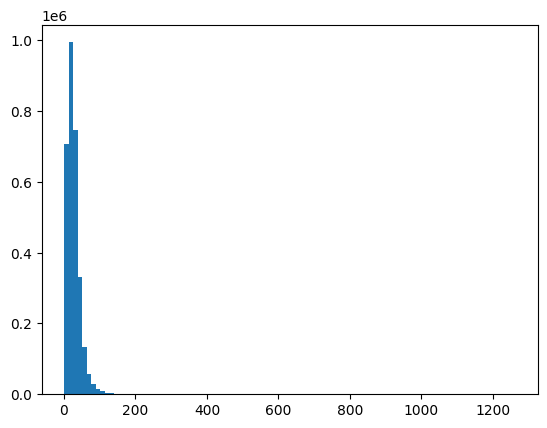

In [11]:
import matplotlib.pyplot as plt 
all_sizes = [len(i.split()) for i in filtered_df["sentence"]]
plt.hist(all_sizes, bins=100)

In [12]:
import numpy as np
all_sizes = np.array(all_sizes)

In [13]:
all_sizes.max()

1262

In [14]:
# all_sizes<256

In [15]:
import numpy as np
Counter(all_sizes<256)


Counter({True: 3034352, False: 494})

In [16]:
Counter(all_sizes<512)

Counter({True: 3034793, False: 53})

In [17]:
	# nreimers/MiniLM-L6-H384-uncased

In [18]:

# from sentence_transformers import SentenceTransformer
# model = SentenceTransformer("facebook/dpr-ctx_encoder-single-nq-base",device ="cuda:0")

# #Our sentences we like to encode
# sentences = filtered_df["sentence"]



In [19]:


# from sentence_transformers import SentenceTransformer
# model = SentenceTransformer('all-MiniLM-L6-v2',device ="cuda:0")

# #Our sentences we like to encode
# sentences = filtered_df["sentence"]

# #Sentences are encoded by calling model.encode()
# embeddings = model.encode(sentences,show_progress_bar=True, batch_size=2096)


In [20]:
# embeddings

In [21]:
# filtered_df["embeddings"] = embeddings.tolist()

In [22]:
from datasets import Dataset 
dataset = Dataset.from_pandas(filtered_df)
# dataset.save_to_disk("/workspace/data/filtered_split_sentences_embeddings")

In [23]:
dataset

Dataset({
    features: ['date', 'hash', 'title', 'sentence'],
    num_rows: 3034846
})

In [24]:
from transformers import DPRContextEncoder, DPRContextEncoderTokenizer
import torch
torch.set_grad_enabled(False)
ctx_encoder = DPRContextEncoder.from_pretrained("facebook/dpr-ctx_encoder-single-nq-base")
ctx_tokenizer = DPRContextEncoderTokenizer.from_pretrained("facebook/dpr-ctx_encoder-single-nq-base")

Some weights of the model checkpoint at facebook/dpr-ctx_encoder-single-nq-base were not used when initializing DPRContextEncoder: ['ctx_encoder.bert_model.pooler.dense.weight', 'ctx_encoder.bert_model.pooler.dense.bias']
- This IS expected if you are initializing DPRContextEncoder from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DPRContextEncoder from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'DPRQuestionEncoderTokenizer'. 
The class this function is called from is 'DPRContextEncoderTokeniz

In [25]:
dataset

Dataset({
    features: ['date', 'hash', 'title', 'sentence'],
    num_rows: 3034846
})

In [26]:
ctx_encoder.device

device(type='cpu')

In [27]:
ctx_encoder.cuda()

DPRContextEncoder(
  (ctx_encoder): DPREncoder(
    (bert_model): BertModel(
      (embeddings): BertEmbeddings(
        (word_embeddings): Embedding(30522, 768, padding_idx=0)
        (position_embeddings): Embedding(512, 768)
        (token_type_embeddings): Embedding(2, 768)
        (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (encoder): BertEncoder(
        (layer): ModuleList(
          (0): BertLayer(
            (attention): BertAttention(
              (self): BertSelfAttention(
                (query): Linear(in_features=768, out_features=768, bias=True)
                (key): Linear(in_features=768, out_features=768, bias=True)
                (value): Linear(in_features=768, out_features=768, bias=True)
                (dropout): Dropout(p=0.1, inplace=False)
              )
              (output): BertSelfOutput(
                (dense): Linear(in_features=768, out_features=768, bias=True)


In [28]:
device = torch.device("cuda")

In [29]:
%%time
ctx_encoder(**ctx_tokenizer(dataset[0]["sentence"], return_tensors="pt").to(device))["pooler_output"].cpu().numpy()

CPU times: user 295 ms, sys: 95.4 ms, total: 390 ms
Wall time: 388 ms


array([[ 9.44872797e-01, -1.52787929e-02,  3.54400426e-01,
         4.45680082e-01, -6.35469854e-02, -1.27723247e-01,
        -1.85291767e-02,  3.10418874e-01, -3.99701893e-01,
         1.32502764e-01, -1.29115395e-02,  7.22522795e-01,
         9.84660983e-02, -1.31150603e-01, -2.49564394e-01,
         2.52525777e-01,  9.86515582e-01,  3.12675476e-01,
         1.09622650e-01, -4.38573062e-01, -2.45320529e-01,
        -1.60926402e-01,  5.40736914e-01, -2.74301022e-01,
        -2.49902420e-02, -6.26286343e-02, -2.01016903e-01,
        -2.39415154e-01, -5.33686101e-01,  2.87955195e-01,
        -2.47095525e-01,  8.03283811e-01,  1.85257137e-01,
        -5.60272038e-01,  1.94067508e-01,  4.85906154e-02,
         3.35175067e-01, -3.46531242e-01, -1.66713253e-01,
        -3.66712600e-01,  1.61160707e-01, -2.66195476e-01,
         2.22974807e-01,  3.96611452e-01, -1.82861283e-01,
         3.07390898e-01, -1.05647564e+00,  3.29033375e-01,
        -5.13433039e-01,  2.23564163e-01, -3.77120674e-0

In [30]:
ctx_encoder.eval()

DPRContextEncoder(
  (ctx_encoder): DPREncoder(
    (bert_model): BertModel(
      (embeddings): BertEmbeddings(
        (word_embeddings): Embedding(30522, 768, padding_idx=0)
        (position_embeddings): Embedding(512, 768)
        (token_type_embeddings): Embedding(2, 768)
        (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (encoder): BertEncoder(
        (layer): ModuleList(
          (0): BertLayer(
            (attention): BertAttention(
              (self): BertSelfAttention(
                (query): Linear(in_features=768, out_features=768, bias=True)
                (key): Linear(in_features=768, out_features=768, bias=True)
                (value): Linear(in_features=768, out_features=768, bias=True)
                (dropout): Dropout(p=0.1, inplace=False)
              )
              (output): BertSelfOutput(
                (dense): Linear(in_features=768, out_features=768, bias=True)


In [31]:
with torch.no_grad():
    ds_with_embeddings = dataset.map(lambda example: {'embeddings': ctx_encoder(**ctx_tokenizer(example["sentence"], return_tensors="pt",padding=True ,truncation=True).to(device))["pooler_output"].detach().cpu().numpy()},num_proc=1)

  6%|▌         | 184718/3034846 [16:58<4:34:56, 172.77ex/s]

In [ ]:
ds_with_embeddings

In [24]:
# dataset = dataset.map(lambda x: {"embeddings": np.array( model.encode(x["sentence"]))}, batched=True, batch_size=2096)

100%|█████████▉| 1447/1448 [12:57<00:00,  1.86ba/s]


In [31]:
# dataset.add_faiss_index(column='embeddings')

100%|██████████| 3035/3035 [00:06<00:00, 469.31it/s]


Dataset({
    features: ['date', 'hash', 'title', 'sentence', 'embeddings'],
    num_rows: 3034846
})

In [34]:
dataset.save_to_disk("/workspace/data/filtered_split_dprc_sentences_embeddings")

Dataset({
    features: ['date', 'hash', 'title', 'sentence', 'embeddings'],
    num_rows: 3034846
})

In [ ]:
ds_with_embeddings.save_to_disk("/workspace/data/filtered_split_sentences_embeddings")

ValueError: please remove all the indexes using `dataset.drop_index` before saving a dataset

In [7]:
# from transformers import DPRContextEncoder, DPRContextEncoderTokenizer
# import torch
# torch.set_grad_enabled(False)
# ctx_encoder = DPRContextEncoder.from_pretrained("facebook/dpr-ctx_encoder-single-nq-base")
# ctx_tokenizer = DPRContextEncoderTokenizer.from_pretrained("facebook/dpr-ctx_encoder-single-nq-base")

Some weights of the model checkpoint at facebook/dpr-ctx_encoder-single-nq-base were not used when initializing DPRContextEncoder: ['ctx_encoder.bert_model.pooler.dense.weight', 'ctx_encoder.bert_model.pooler.dense.bias']
- This IS expected if you are initializing DPRContextEncoder from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DPRContextEncoder from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'DPRQuestionEncoderTokenizer'. 
The class this function is called from is 'DPRContextEncoderTokeniz